In [1]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
Y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
type(X_train)

numpy.ndarray

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
np.unique(Y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [9]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

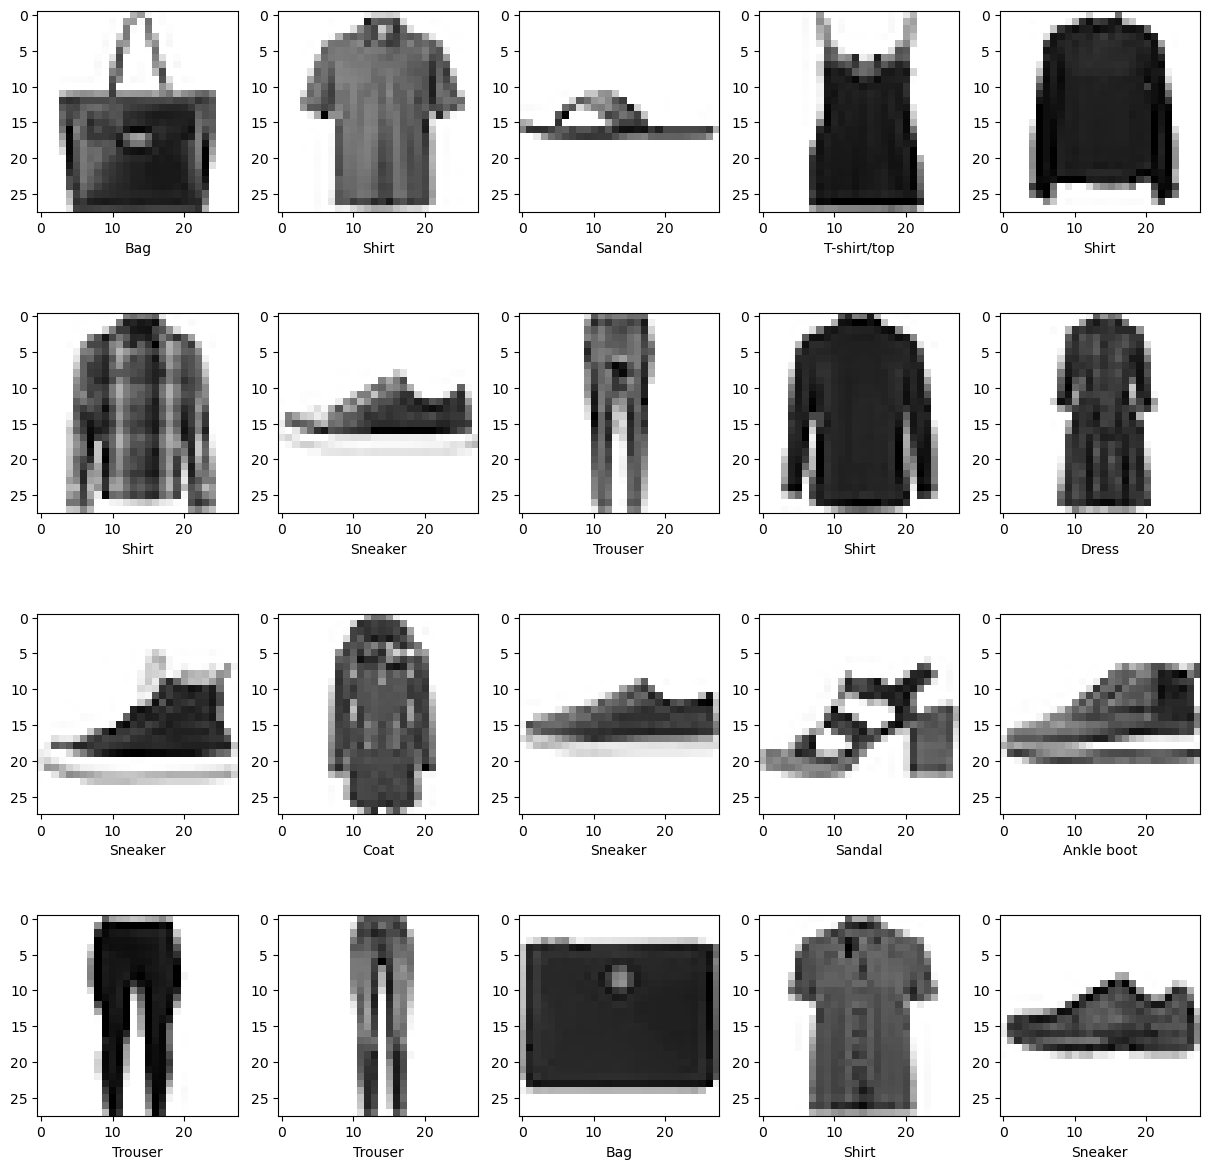

In [20]:
index = list(range(len(Y_train)))
examples = random.sample(index, 20)

plt.figure(figsize=(15, 15))
for i in range(len(examples)):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_train[examples[i]], cmap=plt.cm.binary)
    plt.xlabel(classes[Y_train[examples[i]]])
plt.show()

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10),
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 1s 1ms/step - loss: 0.5197 - accuracy: 0.8166 - val_loss: 0.4047 - val_accuracy: 0.8535
Epoch 2/10
844/844 [==============================] - 1s 1ms/step - loss: 0.3764 - accuracy: 0.8633 - val_loss: 0.3628 - val_accuracy: 0.8670
Epoch 3/10
844/844 [==============================] - 1s 972us/step - loss: 0.3381 - accuracy: 0.8750 - val_loss: 0.3592 - val_accuracy: 0.8658
Epoch 4/10
844/844 [==============================] - 1s 989us/step - loss: 0.3123 - accuracy: 0.8848 - val_loss: 0.3409 - val_accuracy: 0.8765
Epoch 5/10
844/844 [==============================] - 1s 973us/step - loss: 0.2953 - accuracy: 0.8905 - val_loss: 0.3332 - val_accuracy: 0.8807
Epoch 6/10
844/844 [==============================] - 1s 940us/step - loss: 0.2809 - accuracy: 0.8949 - val_loss: 0.3355 - val_accuracy: 0.8758
Epoch 7/10
844/844 [==============================] - 1s 947us/step - loss: 0.2630 - accuracy: 0.9028 - val_loss: 0.3171 - val_accuracy: 0.8

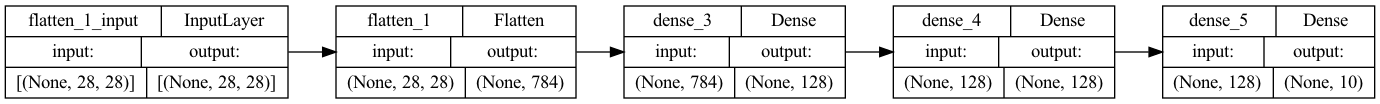

In [15]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir='LR')